In [1]:
import sympy as sp
from sympy import sin, cos, diff, simplify, Matrix

sp.init_printing()

In [2]:
r, t, z = sp.symbols('r, theta, z')

# se especifican "manualmente" las derivadas
dr_dx =  cos(t);     dr_dy =  sin(t)
dt_dx = -sin(t)/r;   dt_dy =  cos(t)/r

# se definen las primeras derivadas utilizando la regla de la cadena
d_dx = lambda f: diff(f,r)*dr_dx + diff(f,t)*dt_dx # + diff(f,z)*dz_dx (dz_dx = 0)
d_dy = lambda f: diff(f,r)*dr_dy + diff(f,t)*dt_dy # + diff(f,z)*dz_dy (dz_dy = 0)
d_dz = lambda f: diff(f,z)

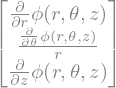

In [3]:
# se define la matriz de transformación T
T = Matrix([[ cos(t), -sin(t), 0 ],
            [ sin(t),  cos(t), 0 ],
            [      0,       0, 1 ]])

# se especifica que phi es función de r y de t
phi = sp.Function('phi')(r, t, z)

# laplaciano en coordenadas rectangulares
grad_phi_rect = Matrix([[ d_dx(phi) ],
                        [ d_dy(phi) ],
                        [ d_dz(phi) ]])

# se convierte el laplaciano de coordenadas rectangulares a coordenadas cilíndricas
grad_phi_cil = simplify(T.T * grad_phi_rect)

grad_phi_cil